In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data

In [2]:
df =pd.read_csv('bank-full.csv',sep=';') 
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### EDA

In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [9]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [37]:
## checking for numerical and categorical columns 

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


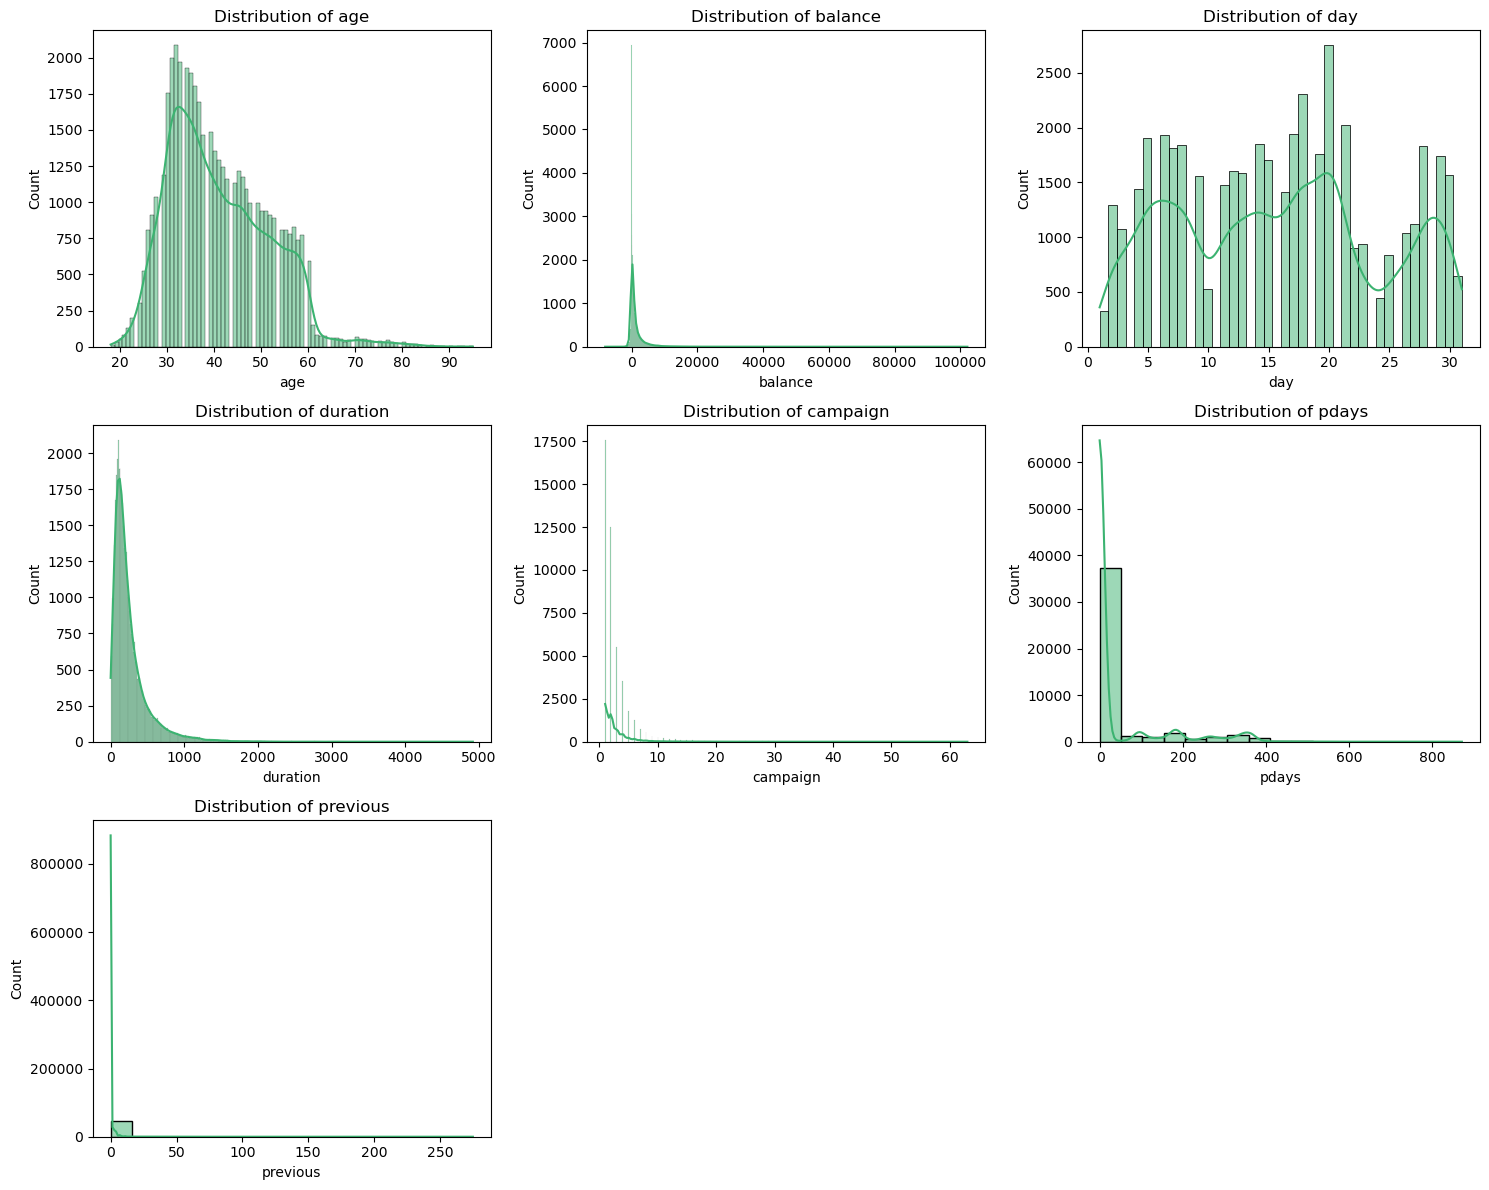

In [16]:
## checking for data distributions for numerical columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i)
    sns.histplot(df[col], kde=True, color='mediumseagreen')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


C:\Users\NanaEkua\AppData\Local\Temp\ipykernel_17644\1784276534.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='coolwarm', order=df[col].value_counts().index)
C:\Users\NanaEkua\AppData\Local\Temp\ipykernel_17644\1784276534.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='coolwarm', order=df[col].value_counts().index)
C:\Users\NanaEkua\AppData\Local\Temp\ipykernel_17644\1784276534.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='coolwarm', order=df[col]

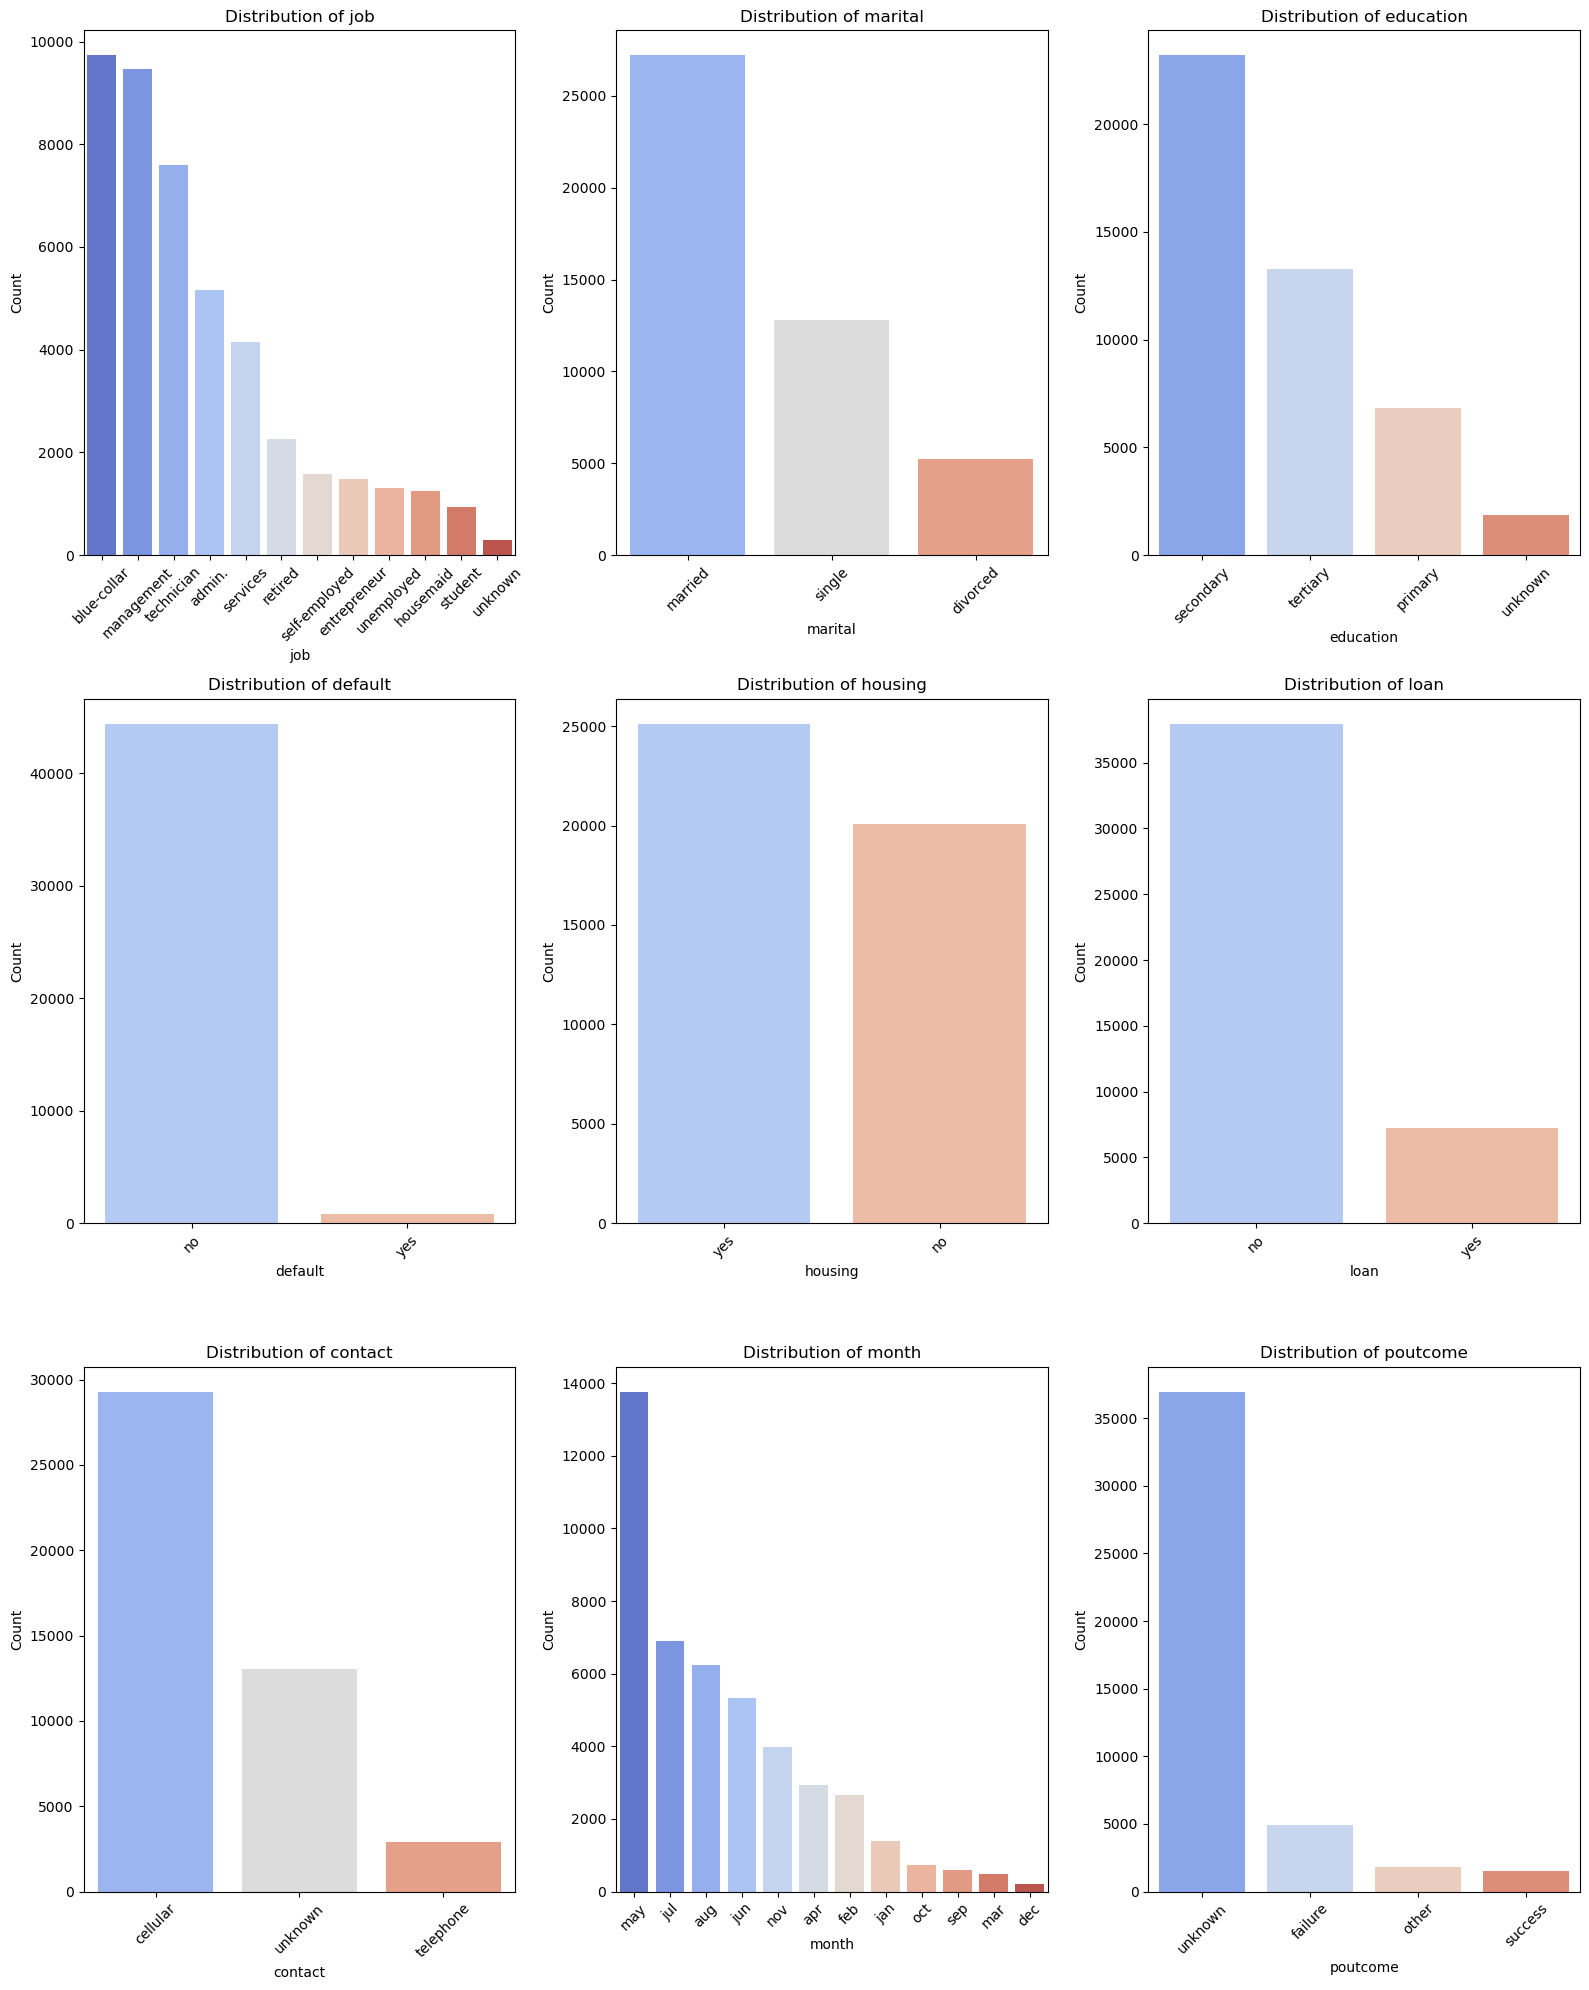

In [20]:
## checking for data distributions for categorical columns

plt.figure(figsize=(16, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) + 2) // 3, 3, i)
    sns.countplot(data=df, x=col, palette='coolwarm', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


C:\Users\NanaEkua\AppData\Local\Temp\ipykernel_17644\1502808113.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='magma')


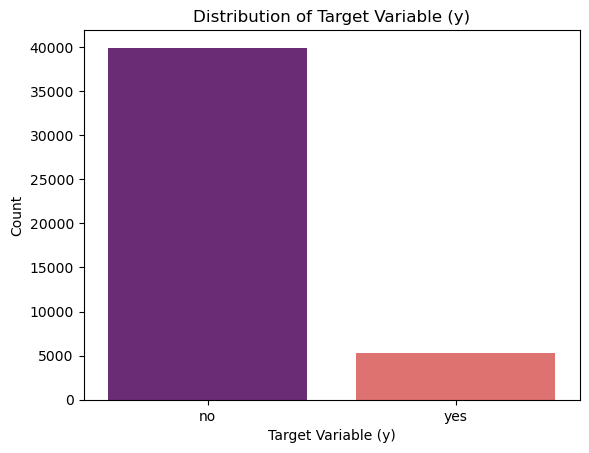

In [21]:
## checking for distribution of target variable (y)

sns.countplot(x='y', data=df, palette='magma')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target Variable (y)')
plt.ylabel('Count')
plt.show()


C:\Users\NanaEkua\AppData\Local\Temp\ipykernel_17644\1436636776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='y', data=df, palette='magma')


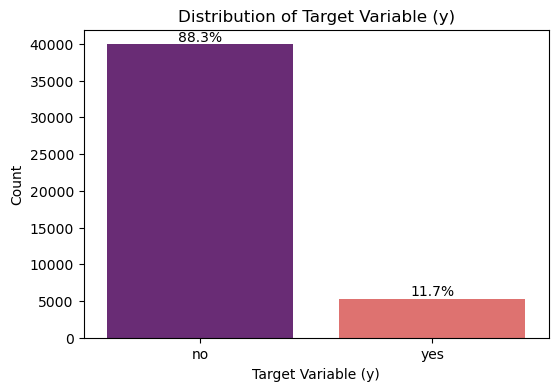

In [23]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='y', data=df, palette='magma')

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target Variable (y)')
plt.ylabel('Count')
plt.show()


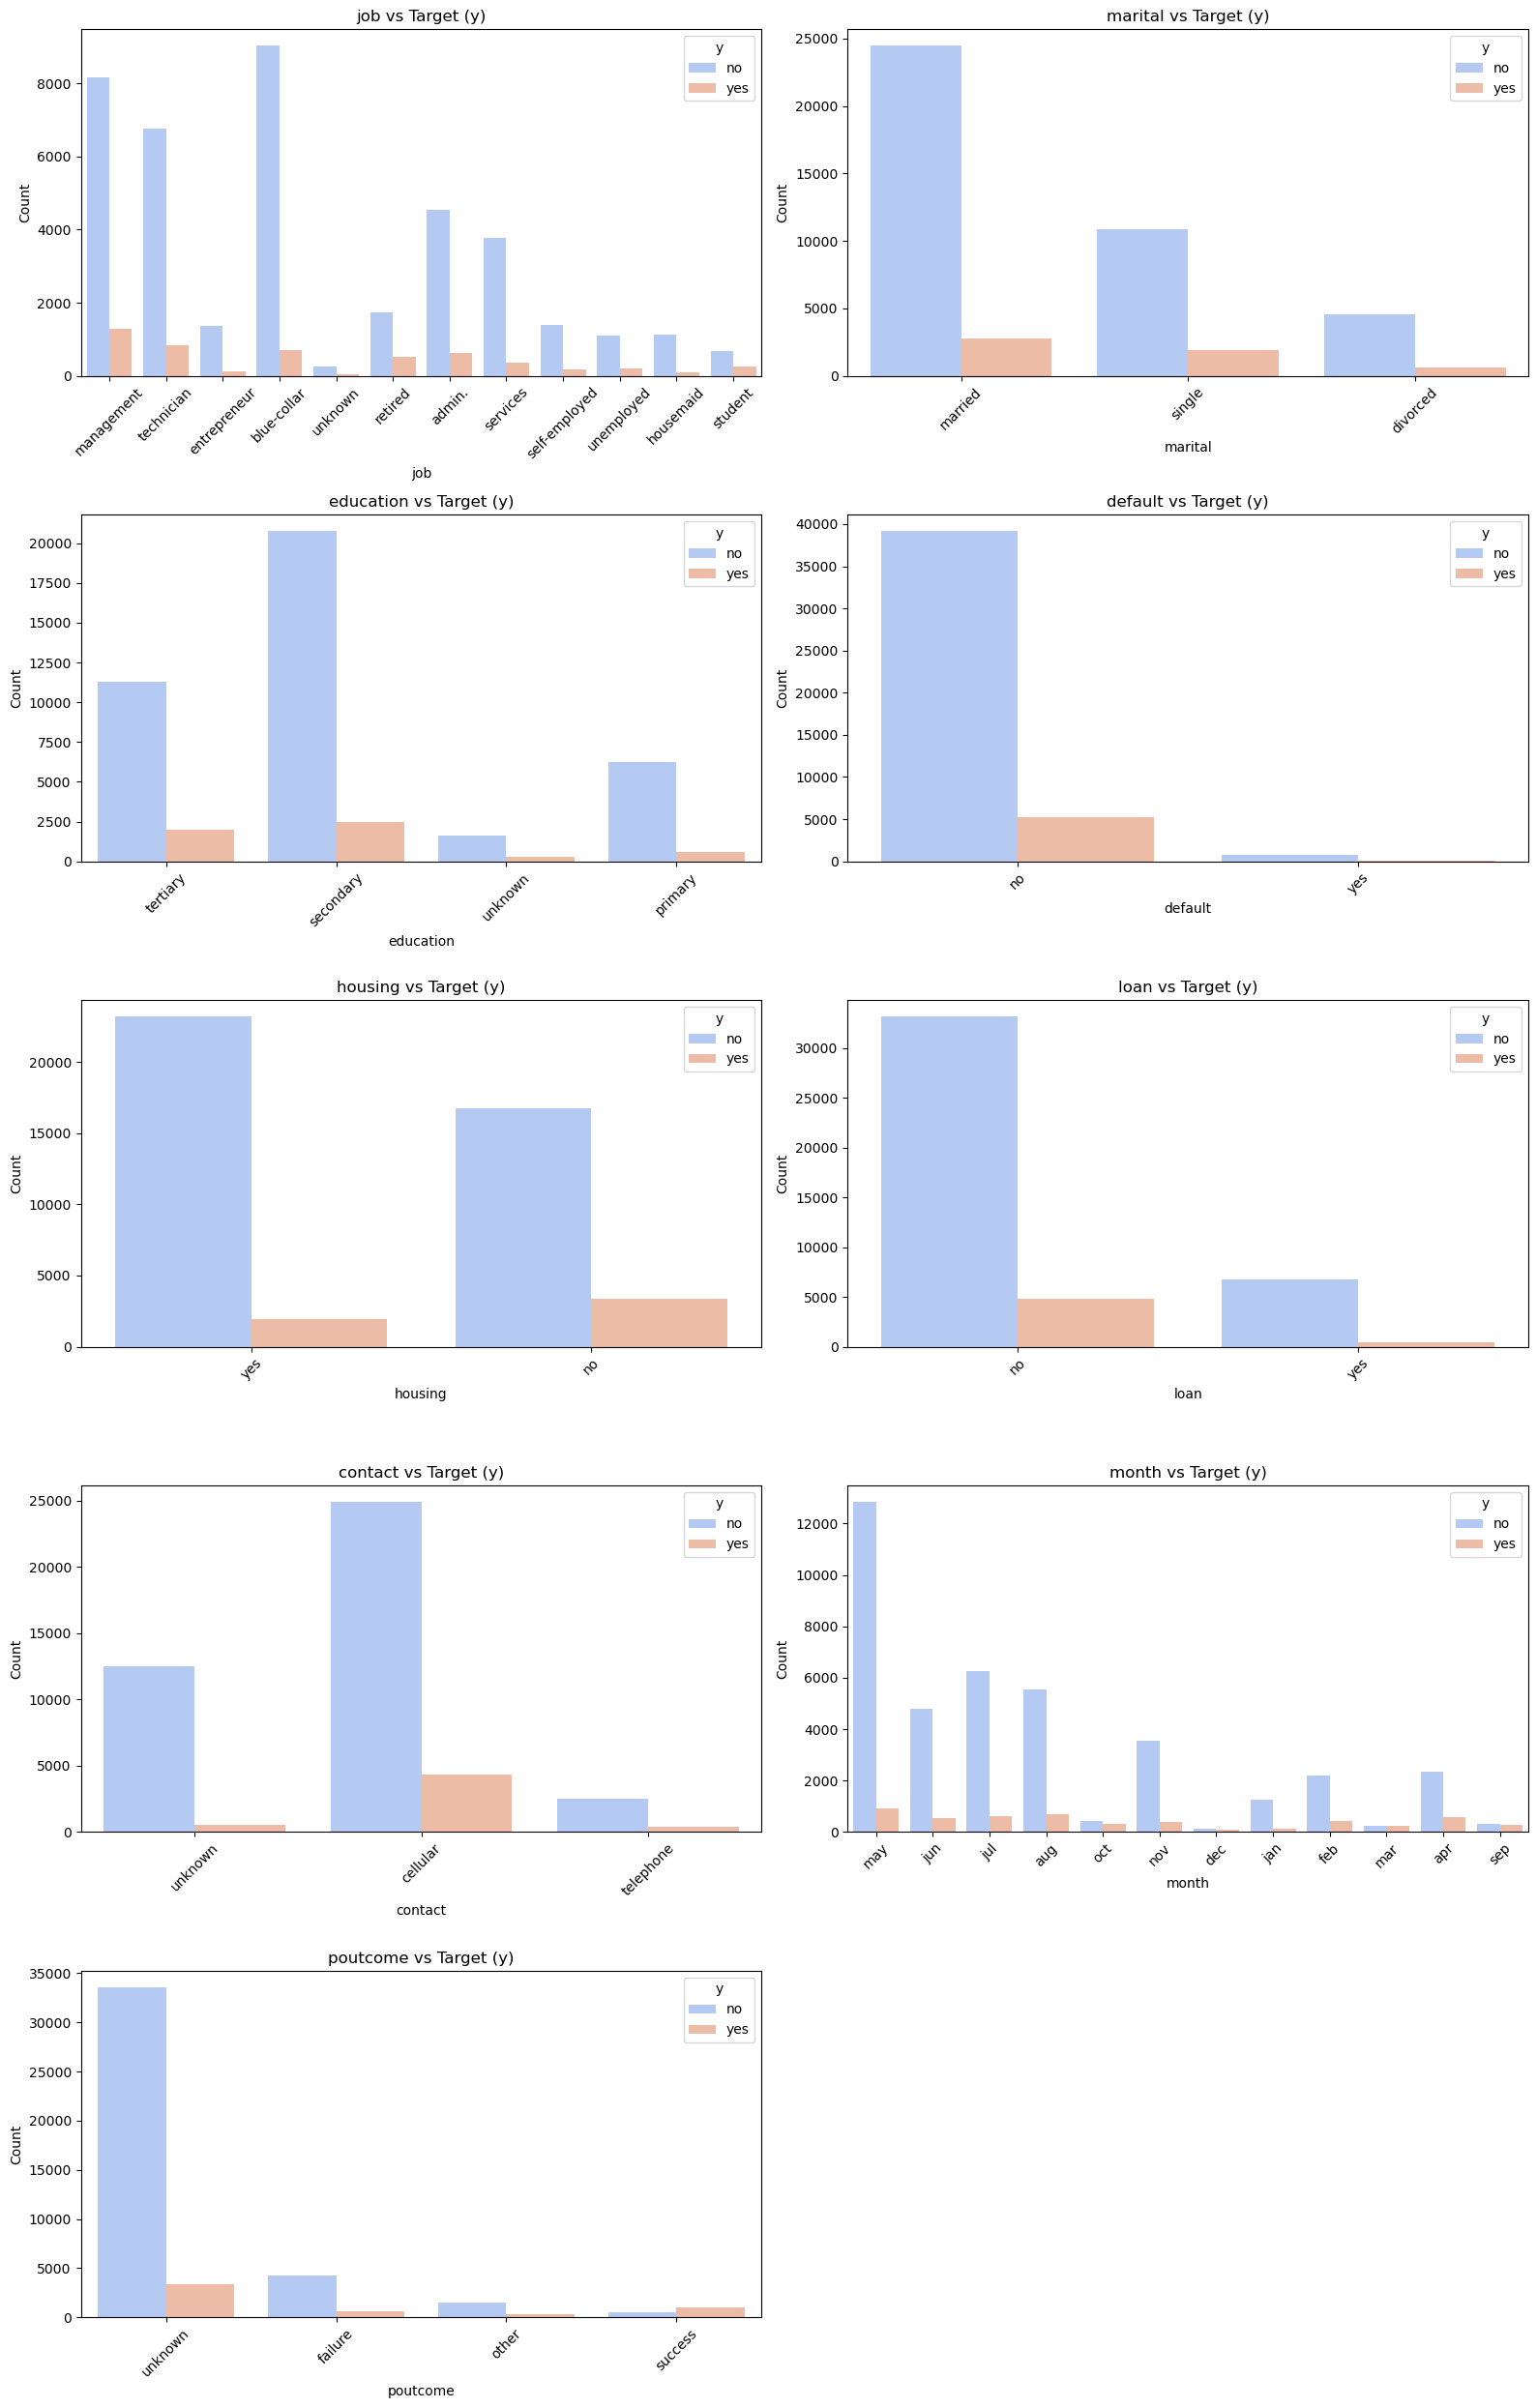

In [24]:


categorical_cols = df.select_dtypes(include='object').columns.drop('y')

plt.figure(figsize=(16, 25))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=col, hue='y', palette='coolwarm')
    plt.title(f'{col} vs Target (y)', fontsize=12)
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


#### Correlation Analysis

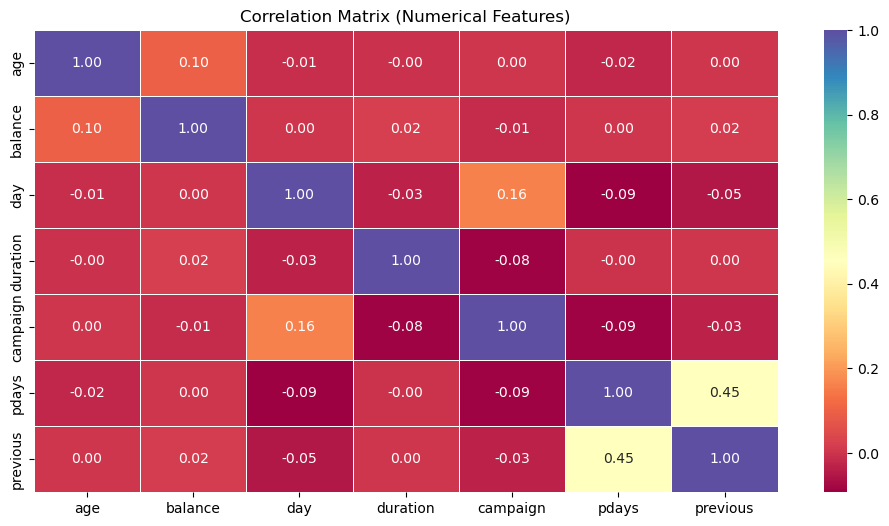

In [36]:

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


#### Findings On Analysis

Numerical Feature Distributions

1. The client ages span from about 17 to 96 years, with the majority of clients concentrated between 30 and 60 years. While the distribution is right-skewed with a peak around 30-40 years, there are a few older clients that stretch the distribution, indicating a diverse age distribution that may influence subscription behaviour.

2. Client balance range widely, from deep negatives to over 100,000, though the majority lie between 0 and 5,000. The distribution is highly right-skewed, driven by a few extreme high values. These outliers stretch the scale, potentially distorting model behavior, and may require normalization or transformation to improve feature performance.

3. Client contact days span from 1 to 31, showing a fairly uniform distribution with distinct peaks around the 15th and 20th.

4. Durations range from 0 to around 5,000 seconds, with most under 500, indicating a highly right-skewed distribution and may be a strong predictor of the target.

5. Client contact frequency per campaign ranges from 1 to over 60 but is right-skewed, with most contacted fewer than 5 times. This reflects varying levels of marketing persistence, which may influence client response.

6. For Pdays, there is a massive spike at 999 which is a placeholder, indicating most clients were never previously contacted. The distribution is extremely right-skewed and sparse outside the 999 mark.

7. Heavily right-skewed with a peak at 0 (first-time contacts). A few high values up to ~275 suggest rare but extreme repeat contact attempts.

8. The distribution of the target variable is highly imbalanced, with approximately 88.3% No and 11.7% Yes subscriptions. Due to this imbalance, metrics like precision, recall, and F1-score over accuracy will be required to properly evaluate model performance.

  
Categorical Feature Distributions 
1. Job: Most clients fall under management and blue-collar roles. Management and technician categories show better subscription rates, pointing to job type as a potentially valuable predictor.

2. Marital: Married clients are the majority, but singles have slightly better conversion rates. Marital status may carry some predictive signal.

3. Education: Secondary and tertiary levels are most common, with tertiary clients responding slightly more positively. Education could influence campaign outcomes.

4. Default, Housing, Loan: The majority of clients have no defaults, housing, or personal loans. Very few positive responses across these features; they are likely weak predictors in isolation.

Contact: Cellular dominates and shows higher success rates compared to telephone or unknown channels. Contact method appears important.

Month: Highest activity seen in May and July, with May yielding more conversions. Indicates possible seasonal effects.

Poutcome: Most clients had no prior campaign outcome, but those marked as "success" show strong response rates; this feature likely holds predictive value.


Correlation Analysis

1. No serious multicollinearity: Most numerical features don’t strongly correlate with each other, so we don’t need to drop any due to redundancy.

2. Duration has the strongest positive correlation with the target (0.39). Longer calls are linked to more “yes” responses, likely a sign of genuine interest.

3. Pdays & Previous also show positive correlation with the target, meaning that clients with past contact history are a bit more likely to subscribe.

4. Campaign: Shows a slight negative correlation — more contact attempts seem to lower the chance of a “yes,” possibly due to customer fatigue.












#### Data Preprocessing

In [38]:
 ##Encoding target variable
df['y_encoded'] = df['y'].map({'yes':1, 'no':0})

In [40]:
# One-hot encoding categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [42]:
# Handling numerical feature skewness with log transformation (add 1 to avoid log(0))

numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for col in ['balance', 'duration', 'campaign', 'pdays', 'previous']:
    
    # Handling negative values in 'balance' and 'pdays' by shifting
    if col in ['balance', 'pdays']:
        df_encoded[col] = np.log1p(df_encoded[col] - df_encoded[col].min() + 1)
    else:
        df_encoded[col] = np.log1p(df_encoded[col])

In [44]:
# Separating features and target
X = df_encoded.drop(['y', 'y_encoded'], axis=1)
y = df_encoded['y_encoded']


In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [52]:
## Scaling numerical features

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [54]:
## Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
## applying SMOTE to balance classes in training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

#### Model Selection & Training

In [58]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

# Gradient Boosting (XGBoost)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      7985
           1       0.38      0.85      0.53      1058

    accuracy                           0.82      9043
   macro avg       0.68      0.84      0.71      9043
weighted avg       0.91      0.82      0.85      9043

ROC AUC: 0.9056902533460067
Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.69      0.32      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.80      0.65      0.69      9043
weighted avg       0.89      0.90      0.89      9043

ROC AUC: 0.9283259135453645


C:\Users\NanaEkua\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:44:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7985
           1       0.63      0.50      0.56      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043

ROC AUC: 0.9290581465957555


Model Performance Summary

Three classification models were evaluated: Logistic Regression, Random Forest, and XGBoost.

Logistic Regression achieved high recall (85%) for the minority class ("yes"), indicating strong sensitivity to potential subscribers. However, its lower precision (38%) led to more false positives.

Random Forest delivered high overall accuracy (90%) and excellent performance on the majority class ("no"), but struggled with the minority class, achieving only 32% recall for "yes" responses.

XGBoost provided the best balance, with solid precision (63%) and improved recall (50%) on the "yes" class, alongside the highest ROC AUC score (0.93), making it the most effective overall.

Conclusion:
XGBoost is recommended as the most balanced model for this classification task, offering strong overall accuracy and improved detection of potential subscribers.

In [59]:
param_grid = {
    'max_depth': [3, 5, 7],          
    'learning_rate': [0.01, 0.1, 0.3],  
    'n_estimators': [100, 200, 300] 
}


In [60]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])


In [61]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False  
)


In [62]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)



In [63]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\NanaEkua\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:11:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [64]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV ROC AUC:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best CV ROC AUC: 0.9338012848007106


### Hyperparameter Tuning Results:
 
The GridSearchCV identified the best hyperparameters for the XGBoost model as:
- learning_rate: 0.1 (moderate step size for weight updates, balancing learning speed and stability)
- max_depth: 5 (controls tree complexity, allowing sufficient depth to capture patterns without overfitting)
- n_estimators: 200 (number of trees, providing enough boosting rounds for strong performance)

The best cross-validated ROC AUC score achieved was approximately 0.93, indicating excellent model capability to distinguish between subscribers and non-subscribers.This suggests the model generalizes well and is suitable for deployment after retraining on the full training data.



In [65]:
best_params = grid_search.best_params_

final_model = XGBClassifier(
    **best_params,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

final_model.fit(X_train, y_train)


C:\Users\NanaEkua\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:12:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [66]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.98      0.86      0.91      7985
           1       0.45      0.86      0.59      1058

    accuracy                           0.86      9043
   macro avg       0.71      0.86      0.75      9043
weighted avg       0.92      0.86      0.88      9043

Test ROC AUC: 0.9302379934967857


### Model Evaluation
- Recall for class 0 is 0.86, meaning the model correctly identifies 86% of non-subscribers.
- Precision for class 1 (subscribers) is moderate (0.45), showing some false positives when predicting subscription.
- Recall for class 1 is high (0.86), indicating the model successfully detects 86% of actual subscribers.
- The F1-score balances precision and recall, with 0.91 for class 0 and 0.59 for class 1, reflecting better performance on the majority class.
- Overall accuracy is 86%, but due to class imbalance, metrics like recall and F1-score for class 1 are more informative.
- The macro average F1-score of 0.75 and weighted average of 0.88 indicate good balanced performance.
- Test ROC AUC of ~0.93 confirms strong model discrimination capability between subscribers and non-subscribers.

In summary, the model effectively identifies most subscribers (high recall) but with moderate precision, which is common in imbalanced datasets. This performance is suitable for practical deployment with possible threshold tuning to optimize trade-offs.


### Feature Importance

C:\Users\NanaEkua\AppData\Local\Temp\ipykernel_17644\1242382326.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


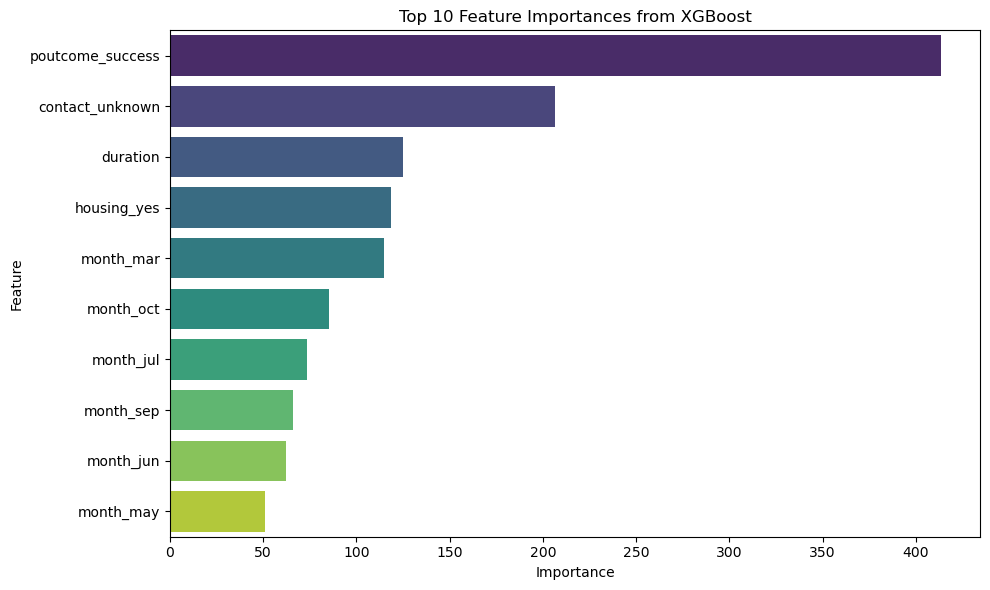

In [70]:
importance_dict = final_model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
})

top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Feature Importances from XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


#### Insights and Recommendations

 Key Insights

Previous Campaign Outcome (poutcome_success):
This variable emerged as the most influential, highlighting that clients who previously subscribed to a term deposit are significantly more inclined to do so again. This reflects strong customer loyalty or trust, consistent with earlier findings from exploratory analysis, where this group showed high subscription rates.

Unknown Contact Type (contact_unknown):
Interestingly, contacts marked as "unknown" play a notable role. While contact method was a differentiator in the EDA (with cellular contacts showing better outcomes), this category likely signals a consistently underperforming group, making it a strong negative predictor.

Call Duration (duration):
Duration of the call continues to stand out as a strong indicator of customer engagement. The earlier correlation analysis showed a meaningful relationship with the target variable, reinforcing that longer, more involved conversations are linked to higher conversion rates.

Housing Loan (housing_yes):
Clients with housing loans also ranked high in feature importance. This could indicate financial maturity or stability and may reflect that these individuals are more responsive to offers—possibly due to existing financial commitments with the bank.

Campaign Month (month_mar, month_oct, etc.):
Certain months—particularly March and October—were shown to be more effective for marketing efforts. While May had a high contact volume during the campaign, its lower importance score suggests that quantity didn’t necessarily translate into quality engagement.

Lesser Role of Demographics:
Notably, demographic variables such as job type, education level, or marital status were absent from the top predictors. This implies that behavioral and campaign-related factors—like past interactions and timing—play a more critical role than static demographic traits.















#### Recommendations for the Bank’s Marketing Strategy

Leverage Existing Relationships:
Focus marketing efforts on individuals who have previously subscribed. These repeat customers show a strong propensity to convert again and could be targeted with loyalty-based campaigns or exclusive renewal offers.

Improve Contact Strategy:
Given the poor performance of unknown contact types, it's advisable to prioritize more effective and traceable channels like mobile contacts. Understanding and reducing the use of "unknown" contact methods may also boost performance.

Emphasize Meaningful Conversations:
Since call duration is a strong success indicator, staff should be trained to engage customers in more thoughtful, personalized dialogues rather than rushed or scripted interactions.

Target Home Loan Holders:
The data suggests that customers with housing loans are more likely to subscribe. This group may be more financially engaged, making them ideal candidates for bundled offers or tailored financial product pitches.

Align Campaigns with High-Performing Months:
Marketing initiatives should be intensified in March and October, as these months show higher effectiveness. In contrast, campaigns in May should focus on improving engagement quality rather than increasing volume.


#### Deployment

In [78]:
import streamlit as st
import joblib


        

In [75]:
# Loading model and preprocessors
model = joblib.load('xgb_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title("Bank Term Deposit Subscription Predictor")


2025-06-17 20:58:35.532 
  command:

    streamlit run C:\Users\NanaEkua\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [85]:

# Load model and scaler
model = joblib.load('xgb_model.pkl')
scaler = joblib.load('scaler.pkl')

# Define categorical and numerical columns based on your preprocessing
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Load the list of all columns used in training after get_dummies (replace with actual list)
# You should save this list during training and load here; for demo, define manually:
all_columns = [
    'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
    # Add all dummy variable columns here, e.g.:
    'job_blue-collar', 'job_admin.', 'job_management', 'job_technician', # etc.
    'marital_married', 'marital_single',
    'education_primary', 'education_secondary', 'education_tertiary',
    'default_no', 'default_yes',
    'housing_no', 'housing_yes',
    'loan_no', 'loan_yes',
    'contact_cellular', 'contact_telephone',
    'month_apr', 'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
    'poutcome_failure', 'poutcome_success', 'poutcome_unknown'
]

st.title("Bank Term Deposit Subscription Predictor")

# Collect inputs
age = st.number_input('Age', min_value=17, max_value=100, value=30)
balance = st.number_input('Balance', value=1000)
day = st.number_input('Day of Month', min_value=1, max_value=31, value=15)
duration = st.number_input('Duration (seconds)', min_value=0, value=100)
campaign = st.number_input('Number of contacts during campaign', min_value=1, value=1)
pdays = st.number_input('Days since last contact', value=999)
previous = st.number_input('Number of contacts before campaign', min_value=0, value=0)

job = st.selectbox('Job', ['admin.', 'blue-collar', 'technician', 'management', 'services', 'retired', 'self-employed', 'unemployed', 'entrepreneur', 'housemaid', 'student', 'unknown'])
marital = st.selectbox('Marital Status', ['married', 'single', 'divorced'])
education = st.selectbox('Education', ['primary', 'secondary', 'tertiary', 'unknown'])
default = st.selectbox('Has credit in default?', ['no', 'yes'])
housing = st.selectbox('Has housing loan?', ['no', 'yes'])
loan = st.selectbox('Has personal loan?', ['no', 'yes'])
contact = st.selectbox('Contact communication type', ['cellular', 'telephone', 'unknown'])
month = st.selectbox('Last contact month', ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
poutcome = st.selectbox('Outcome of previous campaign', ['unknown', 'other', 'failure', 'success'])

# When user clicks predict
if st.button('Predict'):
    # Create input DataFrame
    input_dict = {
        'age': age,
        'balance': balance,
        'day': day,
        'duration': duration,
        'campaign': campaign,
        'pdays': pdays,
        'previous': previous,
        'job': job,
        'marital': marital,
        'education': education,
        'default': default,
        'housing': housing,
        'loan': loan,
        'contact': contact,
        'month': month,
        'poutcome': poutcome
    }
    input_df = pd.DataFrame([input_dict])

    # One-hot encode categorical variables with drop_first=True (like training)
    input_encoded = pd.get_dummies(input_df, columns=categorical_cols, drop_first=True)

    # Add missing columns that were in training but not in input
    missing_cols = set(all_columns) - set(input_encoded.columns)
    for col in missing_cols:
        input_encoded[col] = 0

    # Ensure columns order matches training data
    input_encoded = input_encoded[all_columns]

    # Log-transform balance and pdays as done in training
    for col in ['balance', 'pdays']:
        input_encoded[col] = np.log1p(input_encoded[col] - input_encoded[col].min() + 1)
    # Log-transform other numerical columns
    for col in ['duration', 'campaign', 'previous']:
        input_encoded[col] = np.log1p(input_encoded[col])

    # Scale numerical columns
    input_encoded[numerical_cols] = scaler.transform(input_encoded[numerical_cols])

    # Predict
    prediction = model.predict(input_encoded)
    probability = model.predict_proba(input_encoded)[:, 1]

    # Show results
    st.success(f"Prediction: {'Subscribed' if prediction[0] == 1 else 'Not Subscribed'}")
    st.write(f"Probability of subscription: {probability[0]:.2f}")
